# Thématique 7 - Les règles d’association

### Importation des librairies

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [32]:
# Préparation du fichier de données
filepath = "../data"
filename = "transactions.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Transactions,Items
count,6,6
unique,6,5
top,T1,"HotDogs, Coca, Chips"
freq,1,2


In [33]:
df.head()

,Transactions,Items
0,T1,"HotDogs, Buns, Ketchup"
1,T2,"HotDogs, Buns"
2,T3,"HotDogs, Coca, Chips"
3,T4,"Chips, Coca"
4,T5,"Chips, Ketchup"


In [34]:
df.tail()

,Transactions,Items
1,T2,"HotDogs, Buns"
2,T3,"HotDogs, Coca, Chips"
3,T4,"Chips, Coca"
4,T5,"Chips, Ketchup"
5,T6,"HotDogs, Coca, Chips"


In [35]:
df.shape

(6, 2)

On sait qu'il y a 33 pays pour 3 variables à étudier.

In [36]:
df.dtypes

Transactions    object
Items           object
dtype: object

Dans cette étude, nous avons que des variables quantitatives.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Transactions  6 non-null      object
 1   Items         6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [38]:
df.columns

Index(['Transactions', 'Items'], dtype='object')

In [39]:
df.isnull().sum()

Transactions    0
Items           0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [40]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

TRANSACTIONS :['T1' 'T2' 'T3' 'T4' 'T5' 'T6'] 
ITEMS :['HotDogs, Buns, Ketchup' 'HotDogs, Buns' 'HotDogs, Coca, Chips'
 'Chips, Coca' 'Chips, Ketchup'] 


In [41]:
df

,Transactions,Items
0,T1,"HotDogs, Buns, Ketchup"
1,T2,"HotDogs, Buns"
2,T3,"HotDogs, Coca, Chips"
3,T4,"Chips, Coca"
4,T5,"Chips, Ketchup"
5,T6,"HotDogs, Coca, Chips"


In [42]:
def get_items(data):
    # Initialisation d'une liste pour stocker les items
    items = []

    # Pour chaque ligne
    for elt in data:
        # Split des strings en éléments
        elt = elt.split()

        # Pour chaque élément de la ligne
        for i in range(len(elt)):
            # Formatage de l'élément
            elt[i] = elt[i].replace(',', '')   

            # Ajout de l'élément à la liste des items
            if elt[i] not in items:
                items.append(elt[i])
    
    return items

items = get_items(df['Items'])

print("Nombre de sous-ensembles candidats :", len(items))
print("Liste des sous-ensembles candidats :")
for item in items:
    print("  -", item)

Nombre de sous-ensembles candidats : 5
Liste des sous-ensembles candidats :
  - HotDogs
  - Buns
  - Ketchup
  - Coca
  - Chips


In [43]:
# Initialisation d'un dictionnaire pour compter le nombre d'éléments
item_counter = {item: 0 for item in items}

# Compter les occurrences de chaque item dans les transactions
for elt in df['Items']:
    for item in items:
        if item in elt:
            item_counter[item] += 1

# Affichage du dictionnaire
print(item_counter)

{'HotDogs': 4, 'Buns': 2, 'Ketchup': 2, 'Coca': 3, 'Chips': 4}


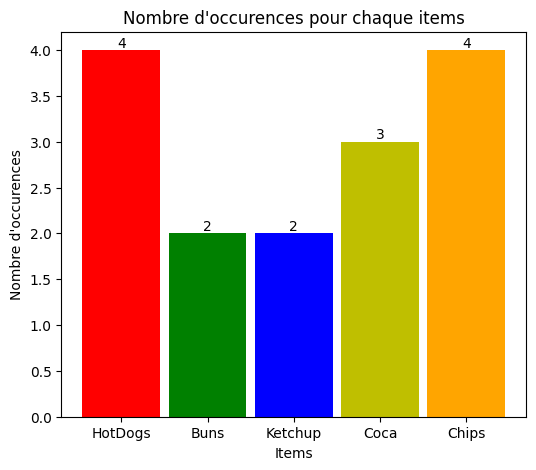

In [44]:
# Pre-processing dataset
data = item_counter
courses = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (6, 5))

# Bar plot
plt.bar(courses, values, color =['r', 'g', 'b', 'y', 'orange'], width = 0.9)

# Ajouter les valeurs exactes au-dessus de chaque barre
for key, value in zip(item_counter.keys(), item_counter.values()):
    plt.text(key, value, str(value), ha='center', va='bottom')

plt.xlabel("Items")
plt.ylabel("Nombre d'occurences")
plt.title("Nombre d'occurences pour chaque items")
plt.show()

Ce dendogramme permet de se rendre compte de la répartition de chaque item.

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

# Nettoyage de la colonne 'Items' et convertion en listes
df_original['Items'] = df_original['Items'].str.strip("[]").str.split(", ")

# Encodage des items
mlb = MultiLabelBinarizer()
encoded_items = mlb.fit_transform(df_original['Items'])

# Création d'un nouveau DataFrame avec les items encodés
encoded_df = pd.DataFrame(encoded_items, columns=mlb.classes_, index=df_original['Transactions'])

# Affichage du DataFrame encodé
print("Table de vérité :")
print(encoded_df)

Table de vérité :
              Buns  Chips  Coca  HotDogs  Ketchup
Transactions                                     
T1               1      0     0        1        1
T2               1      0     0        1        0
T3               0      1     1        1        0
T4               0      1     1        0        0
T5               0      1     0        0        1
T6               0      1     1        1        0


La table de vérité ci-dessous représente les transactions de notre jeu de données, mais sous forme binaire. Soit par exemple, dans la transaction T1, il y a des Buns et des HotDogs.

In [46]:
# Fonction pour tracer les fréquences des sous-ensembles
def plot_frequencies(frequent_itemsets):
    itemsets = list(frequent_itemsets.keys())
    supports = list(frequent_itemsets.values())

    # Création d'un graphique à barres
    plt.figure(figsize=(6, 5))
    bars = plt.bar(range(len(itemsets)), supports, tick_label=[str(itemset) for itemset in itemsets], width=0.9)

    # Ajout des valeurs exactes au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.xlabel('Sous-ensembles')
    plt.ylabel('Support')
    plt.title('Fréquences des Sous-ensembles Fréquents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [47]:
from itertools import combinations

# Fonction pour calculer le support des sous-ensembles de cardinal 2
def calculate_support(transactions, min_support, cardinal):
    transactions = df['Items'].apply(lambda x: x.split(', ')).tolist()

    # Dictionnaire pour stocker le support
    support_count = {}
    total_transactions = len(transactions)

    # Génération de toutes les combinaisons en fonction du cardinal
    for transaction in transactions:
        for combo in combinations(sorted(set(transaction)), cardinal):
            if combo in support_count:
                support_count[combo] += 1
            else:
                support_count[combo] = 1

    # Calcul du support
    frequent_itemsets = {}
    for itemset, count in support_count.items():
        support = count / total_transactions
        if support >= min_support:
            frequent_itemsets[itemset] = support

    return frequent_itemsets

Lorsque l'on pose S0=0.3%, on a le(s) 4 candidat(s) suivants pour un cardinal de 2 :
  - ('Buns', 'HotDogs') : 0.3333333333333333
  - ('Chips', 'Coca') : 0.5
  - ('Chips', 'HotDogs') : 0.3333333333333333
  - ('Coca', 'HotDogs') : 0.3333333333333333


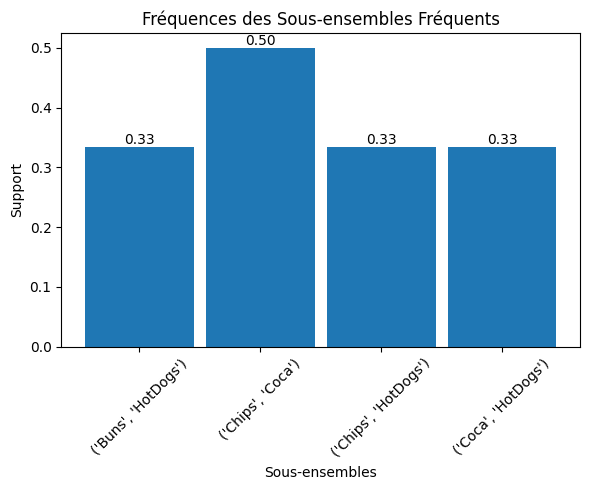

In [48]:
# Seuil de support
min_support = 0.30
frequent_itemsets = calculate_support(df['Items'], min_support, cardinal=2)

# Affichage des résultats
print(f"Lorsque l'on pose S0={min_support}%, on a le(s) {len(frequent_itemsets)} candidat(s) suivants pour un cardinal de 2 :")
for key, value in zip(frequent_itemsets.keys(), frequent_itemsets.values()):
    print(f"  - {key} : {value}")

plot_frequencies(frequent_itemsets)

Sur toutes les transactions, celle avec des chips et du coca revient plus souvent que les autres. Ce qui nous laisse penser qu'il y a de fortes chances que lorsque l'on achète des Chips, on achète également du coca. 

En réalité, le jeu de données est assez petit, il ne compte que 6 transactions, ce qui est peu. Malgré tout, les sous-ensembles ci-dessus sont ceux qui ont un support supérieur à 30%.

Donc, les chips et le coca apparaissent dans 50% des transactions.

Lorsque l'on pose S0=0.3%, on a le(s) 1 candidat(s) suivants pour un cardinal de 3 :
  - ('Chips', 'Coca', 'HotDogs') : 0.3333333333333333


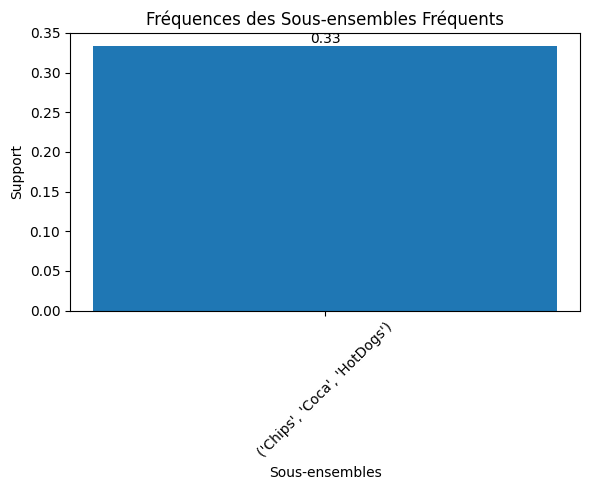

In [49]:
# Seuil de support
min_support = 0.30
frequent_itemsets = calculate_support(df['Items'], min_support, cardinal=3)

# Affichage des résultats
print(f"Lorsque l'on pose S0={min_support}%, on a le(s) {len(frequent_itemsets)} candidat(s) suivants pour un cardinal de 3 :")
for key, value in zip(frequent_itemsets.keys(), frequent_itemsets.values()):
    print(f"  - {key} : {value}")

plot_frequencies(frequent_itemsets)

Parmis les sous-ensembles de cardinal 3, celui avec Chips, Coca et HotDogs est le seul à avoir une fréquence supérieure à 30%. Donc l'achat de CHips, coca et HotDogs apparaissent dans 33% des transactions.

In [51]:
# Fonction pour générer des règles d'association à partir des itemsets fréquents
def generate_association_rules(frequent_itemsets, transactions, min_confidence):
    rules = []
    
    # Pour chaque ensemble fréquent, calcul des règles possibles
    for itemset, support in frequent_itemsets.items():
        # Toutes les combinaisons non vides des items dans l'ensemble fréquent
        for antecedent_size in range(1, len(itemset)):
            for antecedent in combinations(itemset, antecedent_size):
                consequent = tuple(sorted(set(itemset) - set(antecedent)))
                
                if len(consequent) > 0:
                    # Calcul du support
                    antecedent_support = calculate_support_for_itemset(antecedent, transactions)
                    if antecedent_support > 0:
                        # Calcul de la confiance
                        confidence = support / antecedent_support
                        if confidence >= min_confidence:
                            rules.append({
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': support,
                                'confidence': confidence
                            })
    return rules

# Fonction pour calculer le support d'un sous-ensemble spécifique
def calculate_support_for_itemset(itemset, transactions):
    count = 0
    total_transactions = len(transactions)
    for transaction in transactions:
        if all(item in transaction for item in itemset):
            count += 1
    return count / total_transactions

# Transactions sous forme de listes d'items
transactions = df['Items'].apply(lambda x: x.split(', ')).tolist()

# Calcul des règles d'association pour les sous-ensembles fréquents
min_confidence = 0.60
association_rules_card_2 = generate_association_rules(frequent_itemsets, transactions, min_confidence)

# Affichage des règles avec confiance supérieure à 60%
print(f"Règles d'association avec une confiance ≥ {min_confidence*100}% pour des sous-ensembles de cardinalité 2:")
for rule in association_rules_card_2:
    print(f"  - {rule['antecedent']} => {rule['consequent']} (Confiance: {rule['confidence']:.2f}, Support: {rule['support']:.2f})")


Règles d'association avec une confiance ≥ 60.0% pour des sous-ensembles de cardinalité 2:
  - ('Coca',) => ('Chips', 'HotDogs') (Confiance: 0.67, Support: 0.33)
  - ('Chips', 'Coca') => ('HotDogs',) (Confiance: 0.67, Support: 0.33)
  - ('Chips', 'HotDogs') => ('Coca',) (Confiance: 1.00, Support: 0.33)
  - ('Coca', 'HotDogs') => ('Chips',) (Confiance: 1.00, Support: 0.33)


Enfin, voici les règles d'associations avec une confiance de plus de 60%. Ce qui veut dire qu'il y a 60% de chances que si il y a un item dans une transaction, il y aura aussi un autre item qui lui est associé.

Donc ici, dans 100% des cas, si un individu achète des chips et des hotdogs, il y aura du coca. Tout comme s'il y a du coca et des hotdogs, il y aura des chips.

In [52]:
frequent_itemsets_card_3 = calculate_support(df['Items'], min_support, cardinal=3)
association_rules_card_3 = generate_association_rules(frequent_itemsets_card_3, transactions, min_confidence)

# Affichage des règles avec confiance supérieure à 60%
print(f"\nRègles d'association avec une confiance ≥ {min_confidence*100}% pour des sous-ensembles de cardinalité 3:")
for rule in association_rules_card_3:
    print(f"  - {rule['antecedent']} => {rule['consequent']} (Confiance: {rule['confidence']:.2f}, Support: {rule['support']:.2f})")


Règles d'association avec une confiance ≥ 60.0% pour des sous-ensembles de cardinalité 3:
  - ('Coca',) => ('Chips', 'HotDogs') (Confiance: 0.67, Support: 0.33)
  - ('Chips', 'Coca') => ('HotDogs',) (Confiance: 0.67, Support: 0.33)
  - ('Chips', 'HotDogs') => ('Coca',) (Confiance: 1.00, Support: 0.33)
  - ('Coca', 'HotDogs') => ('Chips',) (Confiance: 1.00, Support: 0.33)
